## Api URLS
#### https://www.alphavantage.co/documentation/
#### https://datahub.io/core/s-and-p-500-companies#data-cli

In [1]:
# import dependencies
import csv
import calendar

# API Dependencies
import requests
import json
from pandas.io.json import json_normalize # deal with nested columns in api

# data science libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#formatting detail for visualizations.
%matplotlib inline
%pylab inline

# Config file keys.  We can import multiple keys variables in here
from config import av_key # api key for alpha vantage

Populating the interactive namespace from numpy and matplotlib


In [2]:
# determine the top companies from datahub stock cli
data_url = "https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv"
datahub_df = pd.read_csv(data_url) # raw_df

# sector data - RKY: why do we use .sum() instead of .mean() here?
sector_df = datahub_df.groupby("Sector").sum() 


#sorts the sectors and shows the three largest according to price... 
# It is very important to note that calling this nlargest method creates a new DataFrame.
# This is important because groupby data is harder to access, manipulate, output in my (RKY) opinion than DataFrames.
most_price_df = sector_df.nlargest(3, 'Price')

display(most_price_df)

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Sector,,,,,,,,,,
Consumer Discretionary,10418.90,2119.49,132.082638,409.84,12342.2399,8071.758553,3213562747315,2.941510e+11,191.164584,2440.66
Information Technology,8347.00,2602.59,85.994554,217.70,9714.5049,6432.399100,6727121800912,4.313397e+11,411.609970,761.15
Health Care,8083.46,1406.27,55.951842,264.77,9806.2706,6326.874430,3244359043367,2.231056e+11,294.461598,540.34


In [3]:
# whichever sectors have the highest market cap will shown following the call below. 

market_cap_df = sector_df.nlargest(3, 'Market Cap')

display(market_cap_df)

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Sector,,,,,,,,,,
Information Technology,8347.00,2602.59,85.994554,217.70,9714.5049,6432.39910,6727121800912,4.313397e+11,411.609970,761.15
Financials,6055.81,1169.53,137.172367,301.71,6923.8857,4943.22380,3442649464852,3.597660e+10,228.356354,458.00
Health Care,8083.46,1406.27,55.951842,264.77,9806.2706,6326.87443,3244359043367,2.231056e+11,294.461598,540.34


In [4]:
# ALPHA VANTAGE API SCRAPING

# will need function, symbol, and api key in order to import the json from the api
url_alpha_vantage = "https://www.alphavantage.co/" 

# url variables
function = "TIME_SERIES_DAILY"
symbol = "MSFT"
outputsize = "full" # full or compact (100 latest vs all data)

# Following the query will show you a xml(?) page, which you should do because it is good for understanding.
# I've uncommented the print(query) command so you can click on the link and see for yourself (don't abuse Ram's key!)
query = url_alpha_vantage + "query?" + "function=" + function + "&symbol=" + symbol +"&outputsize=" + outputsize + "&apikey=" + av_key  
url_response = requests.get(query).json()


print(query)
# commented out as part of testing process
# pretty print the json
# print(json.dumps(url_response, indent=4, sort_keys=True))

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=A2JKUWFZLQ7633GK


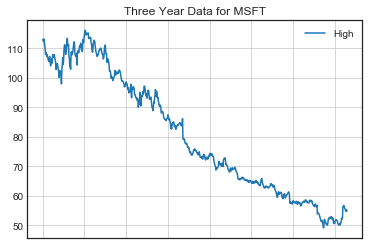

In [6]:
# create a data frame from the json
# I'm renaming this thing two times to show the logic - we are getting three year data for one company, Microsoft.
# Then, we are accessing the Time Series (Daily) dict metadata (first out of five), then I am abbreviating it.
microsoft_df = timeseries_df = ts_df = pd.DataFrame.from_dict(url_response["Time Series (Daily)"])


# artifacts from testing (ignore unless you want to try things out yourself.)
# microsoft_df = pd.DataFrame.from_dict(url_response, orient = 'columns')
#microsoft_df = microsoft_df.tail(730)



# Rename the index to actually be accurate.
ts_df.index.name = "Date"

# only look at data from the past 3 years 
ts_df = ts_df.T.head(730)

# Rename columns so they don't look unprocessed and bad.
# create the dictionary to pass to the rename method.
re_col = {"1. open": "Open", "2. high": "High", "3. low": "Low","4. close": "Close", "5. volume": "Volume"}

# baptize the columns.
ts_df = ts_df.rename(columns = re_col)
#display(ts_df.head(730))
# begin visualization of one stock

index = list(ts_df.index)

vis_df = pd.DataFrame({"High":ts_df["High"]}, index = index)
vis_df = vis_df.astype(float)


plt.style.use('seaborn-white')
vis_df.plot(grid=True,title=f'Three Year Data for {symbol}')


plt.show()